**Principal component analysis (PCA)** is a dimension reduction technique that enables to identify correlations and patterns in a dataset so it can be transformed into a dataset of significant lower dimensions and keeping the most relevant information.

This notebook explains the key steps of PCA 

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset preparation

Loading and analyzing the iris flowers dataset.

In [5]:
iris_dataset = pd.read_csv('https://raw.githubusercontent.com/Giffy/AI_Intro-to-Machine-Learning/master/Session-5/Datasets/iris.data.zip', header=None)
iris_dataset.columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label']
iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


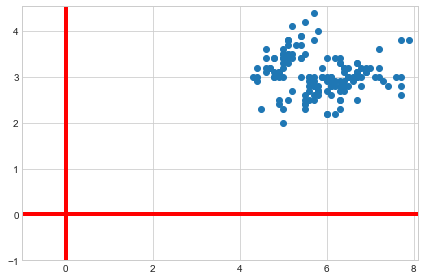

In [6]:
with plt.style.context('seaborn-whitegrid'):
  plt.figure()
  plt.scatter(iris_dataset.iloc[:,0],iris_dataset.iloc[:,1])
  plt.ylim(ymin=-1)
  plt.xlim(xmin=-1)
  plt.axhline(linewidth=4, color='r')
  plt.axvline(linewidth=4, color='r')
  plt.tight_layout()
  plt.show()

# Principal Component Analysis (step by step)


### 1 Standardize the data
We need to standatize the data because the PCA's output is influenced based on the scale of the features of the data.

In [7]:
features = iris_dataset.columns.to_list()[:4]
x = iris_dataset.loc[:, features]
x = x[:].replace(np.nan,0 , regex=True)                         # Replaces all null values to 0, if any
x = x.values                         
x_std = StandardScaler().fit_transform(x)                       # Performs standarization of the dataset

In [14]:
x_std.shape

(150, 4)

In [15]:
x_std[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

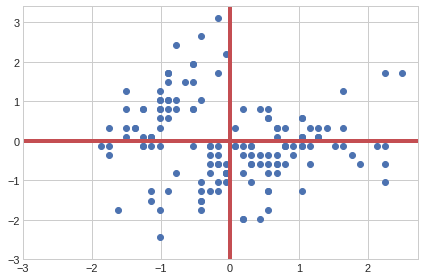

In [0]:
x_std_df = pd.DataFrame(x_std)
with plt.style.context('seaborn-whitegrid'):
  plt.figure()
  plt.scatter(x_std_df.iloc[:,0],x_std_df.iloc[:,1])
  plt.ylim(ymin=-3)
  plt.xlim(xmin=-3)
  plt.axhline(linewidth=4, color='r')
  plt.axvline(linewidth=4, color='r')
  plt.tight_layout()
  plt.show()

### 2 Building the covanciance matrix

The covariance between two features is calculated as follows:

$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

We can summarize the calculation of the covariance matrix via the following matrix equation:   
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$  
where $\mathbf{\bar{x}}$ is the mean vector 
$\mathbf{\bar{x}} = \sum\limits_{i=1}^n x_{i}.$  
The mean vector is a $d$-dimensional vector where each value in this vector represents the sample mean of a feature column in the dataset.

In [0]:
mean_vec = np.mean(x_std, axis=0)
cov_mat = (x_std - mean_vec).T.dot((x_std - mean_vec)) / (x_std.shape[0]-1)
print('Covariance matrix \n {}'.format(cov_mat))

Covariance matrix 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


Visualization of correlation matrix, to visualize the correlation between features

The coefficient of correlation between two features is measured between +1.0 (it means that there is perfect positive correlation) and -1.0 (it means that there is perfect negative correlation), where 0.0 means no correlation.

$corr_{XY} = \frac{cov {XY}}{stdev X - stdev Y}$

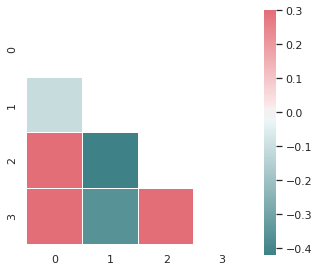

In [0]:
sns.set(style="white")

df = pd.DataFrame(x_std)
corr = df.corr()                                     # Compute the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))    # Generate a mask for the upper triangle
f, ax = plt.subplots(figsize=(5, 9))                 # Set up the matplotlib figure size
cmap = sns.diverging_palette(200, 10, as_cmap=True)  # Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### 3 Calculate eigendecomposition on covariance matrix

Eigendecomposition of the standardized data based on the correlation matrix:

In [0]:
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n {}'.format(eig_vecs))
print('\nEigenvalues \n {}'.format(eig_vals))

Eigenvectors 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
 [2.93035378 0.92740362 0.14834223 0.02074601]


Visually confirm that the list is correctly sorted by decreasing eigenvalues.

The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.

In [0]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
  print (i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [0]:
print('Variation per principal component::')
eig_val_list = [i[0] for i in eig_pairs]
for i in eig_val_list:
  print (round( (i /sum(eig_val_list)),7))

Variation per principal component::
0.7277045
0.2303052
0.0368383
0.0051519


### 4 Compute principal components

In [0]:
# Explained variance
pca = PCA(n_components=4).fit(x_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72770452 0.23030523 0.03683832 0.00515193]


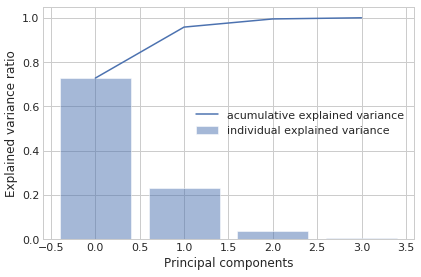

In [0]:
pc_explained = pca.explained_variance_ratio_.tolist()
with plt.style.context('seaborn-whitegrid'):
  plt.figure(figsize=(6, 4))

  plt.bar(range(len(pc_explained)), pc_explained, alpha=0.5, align='center',
          label='individual explained variance')
  plt.plot(range(len(pc_explained)), np.cumsum(pc_explained),
            label='acumulative explained variance')

  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.tight_layout()

### 5 Reduce the data dimensions to 2D

In [0]:
pca = PCA(n_components=2).fit(x_std)
x_pca = pca.transform(x_std)
x_pca.shape

(150, 2)

We've reduced 4 dimensions to 2 dimensions

###6 PCA dataset visualization

In [0]:
df_pca = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2'])
df_pca.tail()

,principal component 1,principal component 2
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362
149,0.959299,-0.022284


<Figure size 432x288 with 0 Axes>

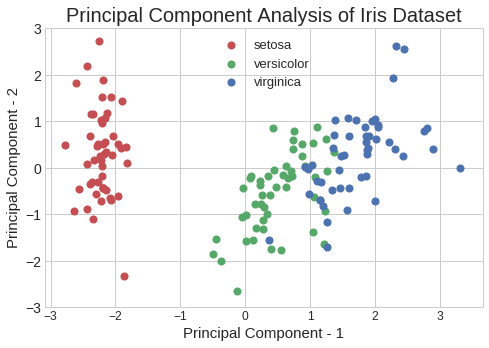

In [0]:
with plt.style.context('seaborn-whitegrid'):
  fig = sns.FacetGrid(tips, col="time")
  plt.figure()
  plt.figure(figsize=(7,5))
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=14)
  plt.xlabel('Principal Component - 1',fontsize=15)
  plt.ylabel('Principal Component - 2',fontsize=15)
  plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
  targets = iris_dataset['label'].unique()
  colors = ['r', 'g', 'b']
  for target, color in zip(targets,colors):
      indicesToKeep = iris_dataset['label'] == target
      plt.scatter(df_pca.loc[indicesToKeep, 'principal component 1'],
                  df_pca.loc[indicesToKeep, 'principal component 2'], 
                  c = color, s = 50)
  plt.legend(targets,prop={'size': 13}, loc='upper center')
  plt.tight_layout()
  plt.show()